# Distribuição de Frequências

SICSÚ, Abraham L.; DANA, Samy. **Estatística Aplicada**: Análise Exploratória de Dados. São Paulo: Editora Saraiva, 2012. 9788502177574

[Minha biblioteca](https://integrada.minhabiblioteca.com.br/#/books/9788502177574/)

O número de chamados ao serviço de manutenção da fábrica GVTECH em 60 dias úteis consecutivos (cada semana corresponde a uma linha do arquivo CSV - de 2ª a 6ª).

> `a.`	represente graficamente a distribuição de frequências do número de chamados e analise-a. Ignore o missing value da oitava semana.
>
> `b.` O diagrama de barras permite dizer se o número de chamadas é maior em um dia da semana particular? Por quê? 
>
> `c.`	Considerando que você tem os dados em ordem cronológica, que outro tipo de análise deveria fazer? que tipo de informação você obteria? 
>
> `d.`	Se você fosse “obrigado” a utilizar um valor no lugar do missing value, que valor utilizaria?
> - R: _O valor ZERO (0) poderia ser aplicado ao feriado, pois não há expediente da fábrica no feriado e consequentemente chamado de ocorrência para essa data_


In [2]:
import numpy as np
import pandas as pd

In [14]:
df = pd.read_csv("D:\Data\PJI240\GVTECH.csv", sep=';',
                 names = ['seg', 'ter', 'qua', 'qui', 'sex'],
                 dtype = np.int16)
df.index = range(1, len(df)+1)
df.head(3)

,seg,ter,qua,qui,sex
1,1,2,3,0,2
2,4,3,2,2,2
3,1,2,0,2,4


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 1 to 12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   seg     12 non-null     int16
 1   ter     12 non-null     int16
 2   qua     12 non-null     int16
 3   qui     12 non-null     int16
 4   sex     12 non-null     int16
dtypes: int16(5)
memory usage: 252.0 bytes


In [18]:
# Obtendo as 60 observações indistintamente
df_stacked = df.stack()

In [19]:
# Obtendo-se a aplitude da amostra
np.min(df_stacked), np.max(df_stacked)

(0, 4)

In [20]:
# Obtendo-se os valores distintos
df_stacked.value_counts()

2    23
1    14
0     8
4     8
3     7
dtype: int64

## `a.` Distribuição de frequência

### Para todas as observações

<AxesSubplot:>

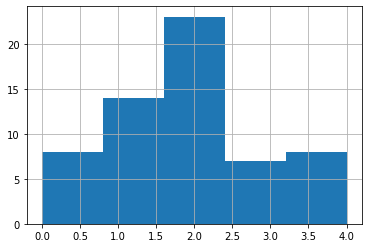

In [26]:
# Para as 60 observações
df_stacked.hist(bins=5)

In [33]:
np.mean(df)

seg    1.833333
ter    1.833333
qua    2.333333
qui    1.416667
sex    2.000000
dtype: float64

In [42]:
df.describe()

,seg,ter,qua,qui,sex
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,1.833333,1.833333,2.333333,1.416667,2.000000
std,1.267304,1.029857,1.154701,0.900337,1.537412
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000,1.000000,0.750000
50%,1.500000,2.000000,2.000000,1.500000,2.000000
75%,2.250000,2.000000,3.000000,2.000000,3.250000
max,4.000000,4.000000,4.000000,3.000000,4.000000


<u>Comentários:</u> Observando-se a distribuição de frequência para todas observações (doze semanas corridas), podemos verificar que a maioria dos números de chamados (por dia) para manutenção da fábrica está entre 0 e 2 chamados. Sendo que a maior média observada ocorreu na 4ª feira e a menor na 5ª, inclusive para este dia não houve mais de 3 chamados no dia. 4ª feira parece ser o dia mais requisitado em relação aos chamados, pois o intervalo interquartil (IQR representa os 50% do meio de um conjunto de dados) situa-se em 2 chamados.

## `b.` Segregando-se as observações por dia da semana

array([[<AxesSubplot:title={'center':'seg'}>,
        <AxesSubplot:title={'center':'ter'}>],
       [<AxesSubplot:title={'center':'qua'}>,
        <AxesSubplot:title={'center':'qui'}>],
       [<AxesSubplot:title={'center':'sex'}>, <AxesSubplot:>]],
      dtype=object)

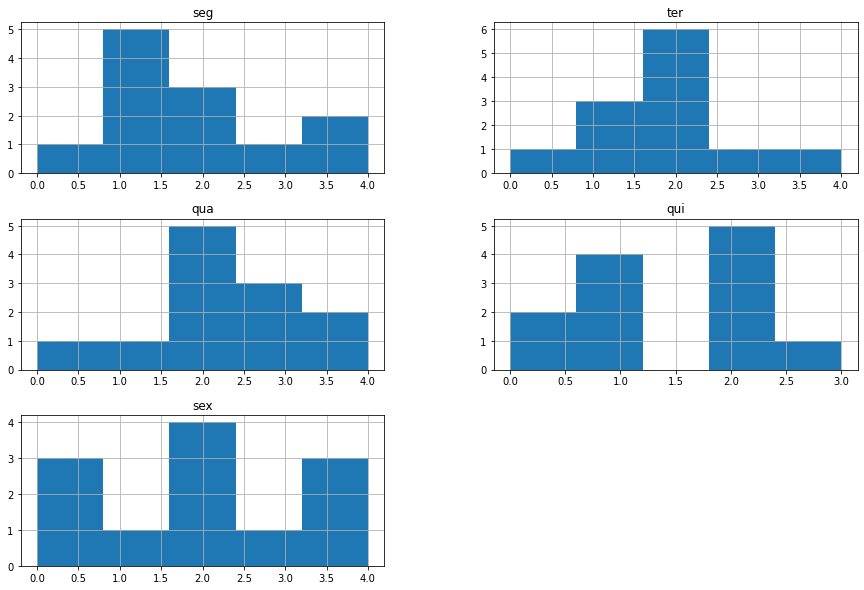

In [39]:
# Por dia da semana
df.hist(figsize=(15,10), bins=5)

In [43]:
df.sum()

seg    22
ter    22
qua    28
qui    17
sex    24
dtype: int64

In [47]:
np.mean(df.sum())

22.6

<u>Comentários:</u> Para 2ª feira a maioria dos chamados ficaram entre 1 a 2 por dia. Já para 3ª e 4ª feira em 2 por dia. 5ª feira parece ser o dia com menos intercorrências de manutenção pois o total no período foi de 17 quando a média, por dia foi de 22.6. Quanto a 6ª a distribuição é uniforme, com muitas ocorrências acumuladas.

## `c.` Que tipo de análsie poderia ser feita por dia da semana?

Vide comentários acima referente a distribuição de frequência por dia da semana. Além disso:

- A partir da 4ª feira os atendimentos para chamados de manutanção devem ser intensificados para que sejam atendidos até 6ª feira.
- É possível que os dias de 5ª e 6ª, pela análise inicial, acumulem, indevidamente chamados não atendidos nos dias anteriores